We start with a csv (comma-separated-variable) file that is output from the DoubleElectron dataset from the CMS experiment. The data was collected in 2011.

The selections used on the two electrons:
* opposite charge
* 60 < $M_{ee}$ < 120 GeV 
* [More needed...]

Let's calculate the invariant mass $M$ of the two electrons where:

$M = \sqrt{2p_{t}^{1}p_{t}^{2}(\cosh(\eta_{1}-\eta_{2}) - \cos(\phi_{1}-\phi_{2}))}$

In [1]:
import csv
import math
import numpy

invariant_mass = []

with open('./data/Zee_Run2011A.csv') as csvfile:
    
    reader = csv.DictReader(csvfile)
   
    for row in reader:
    
        pt1 = float(row['pt1'])
        eta1 = float(row['eta1'])
        phi1 = float(row['phi1'])
       
        pt2 = float(row['pt2'])
        eta2 = float(row['eta2'])
        phi2 = float(row['phi2'])
    
        M = math.sqrt(2*pt1*pt2*(math.cosh(eta1-eta2) - math.cos(phi1-phi2)))
        invariant_mass.append(M)
        
M_hist = numpy.histogram(invariant_mass, bins=120, range=(60,120))

print(len(invariant_mass))

28696


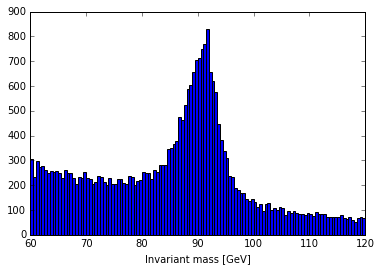

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

hist, bins = M_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.xlabel('Invariant mass [GeV]')
plt.show()
